In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,8)
from pymongo import MongoClient
import datetime
import numpy as np
import pandas as pd

In [4]:
c=MongoClient('holmes-carl.cems.umn.edu',27017)
db=c.oleds
db.authenticate('lifetime','Ir(ppy)3')


True

In [13]:
archs=db.architectures.find({'eml_thickness':10})
print(archs.count())
aids=[a['_id'] for a in archs]

gs=db.growths.find({'grower_name':'kyle','architectureID':{'$in':aids},'device_area':.25})
print(gs.count())
g=gs.next()

30
28


In [6]:
g=db.growths.find_one({'grower_name':'kyle','growth_date':datetime.datetime(2018,1,24,0,0)})

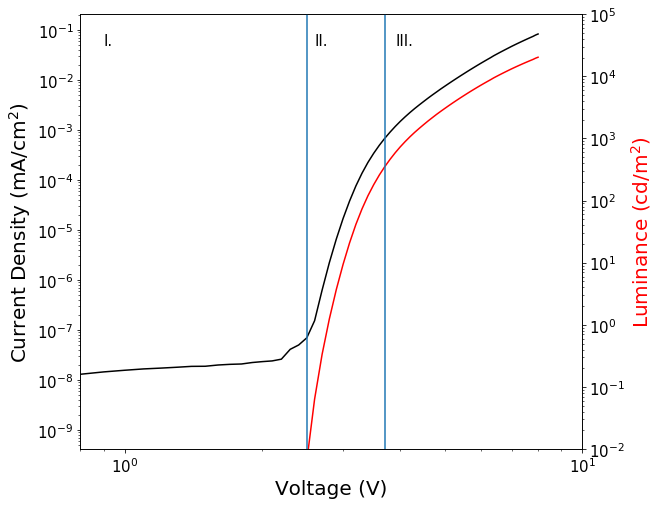

In [74]:
on=np.zeros(len(g['devices']))
on[1]=1
f, (ax1) = plt.subplots(1, 1)
ax1.set_xlim([.8,10])
for i,d in enumerate(g['devices']):
    if on[i]==1:
        ax1.loglog(d['V_raw'],np.array(d['I_dev_raw'])*4,c='black')
ax1.set_xlabel('Voltage (V)', fontsize=20)
ax1.set_ylabel('Current Density (mA/cm$^2$)', fontsize=20)
ax1.tick_params(axis='x', labelsize=15)
ax1.tick_params(axis='y', labelsize=15)

ax2 = ax1.twinx()
for i,d in enumerate(g['devices']):
    if on[i]==1:
        ax2.loglog(d['V'],np.array(d['cdm2']),c='red')
#ax2.set_xlabel('Voltage (V)', fontsize=15)
ax2.set_ylabel('Luminance (cd/m$^2$)',color='r', fontsize=20)
ax2.tick_params(axis='y', labelsize=15)
ax2.yaxis.set_label_position("right")
ax2.set_ylim([1e-2,1e5])
plt.axvline(x=2.5)
plt.axvline(x=3.7)
ax1.text(.9, 5E-2, 'I.', fontsize=15)
ax1.text(2.6, 5E-2, 'II.', fontsize=15)
ax1.text(3.9, 5E-2, 'III.', fontsize=15)

plt.show()

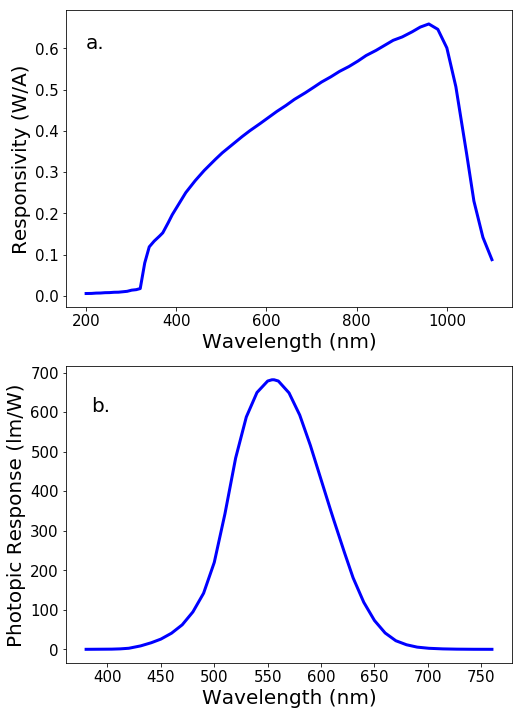

In [93]:
plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
resp=pd.read_csv('detector_responsivity.csv',names=['wavelength','responsivity'])
plt.plot(resp['wavelength'],resp['responsivity'],linewidth=3,c='blue')
plt.tick_params(labelsize=15)
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Responsivity (W/A)',fontsize=20)
plt.text(200, .6, 'a.', fontsize=20)

plt.subplot(2,1,2)
pr=pd.read_csv('photopic_response.csv',names=['wavelength','pr'])
plt.plot(pr['wavelength'],pr['pr'],linewidth=3,c='blue')
plt.tick_params(labelsize=15)
plt.xlabel('Wavelength (nm)',fontsize=20)
plt.ylabel('Photopic Response (lm/W)',fontsize=20)
plt.text(385, 600, 'b.', fontsize=20)

plt.show()

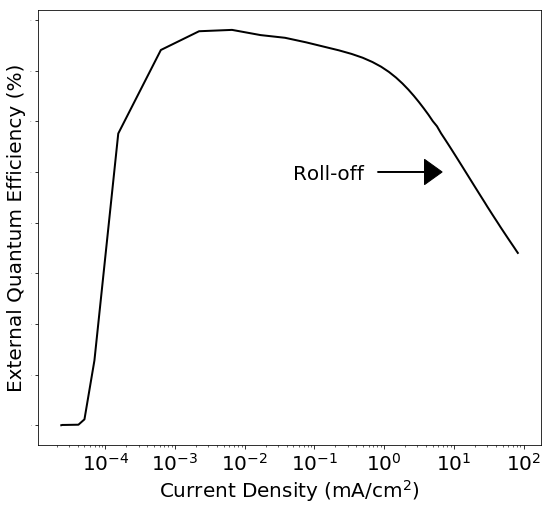

In [41]:
d=g['devices'][1]
plt.semilogx(d['J'],np.array(d['EQE']),linewidth=2,c='black')
plt.xlabel('Current Density (mA/cm$^2$)', fontsize=20)
plt.ylabel('External Quantum Efficiency (%)', fontsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=0)
plt.arrow( .8, 10, 3, 0, fc="k", ec="k",head_width=1, head_length=3 )
plt.text(.05, 9.7, 'Roll-off', fontsize=20)
plt.show()